In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import pandas as pd
import os
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
os.chdir('/Users/magictavern/Downloads')

In [2]:
df=pd.read_csv('1547025443416.csv')
print(df.shape)
data=df[df.LTV!=0]

(223323, 6)


,retention,LTV
retention,1.000000,0.166863
LTV,0.166863,1.000000


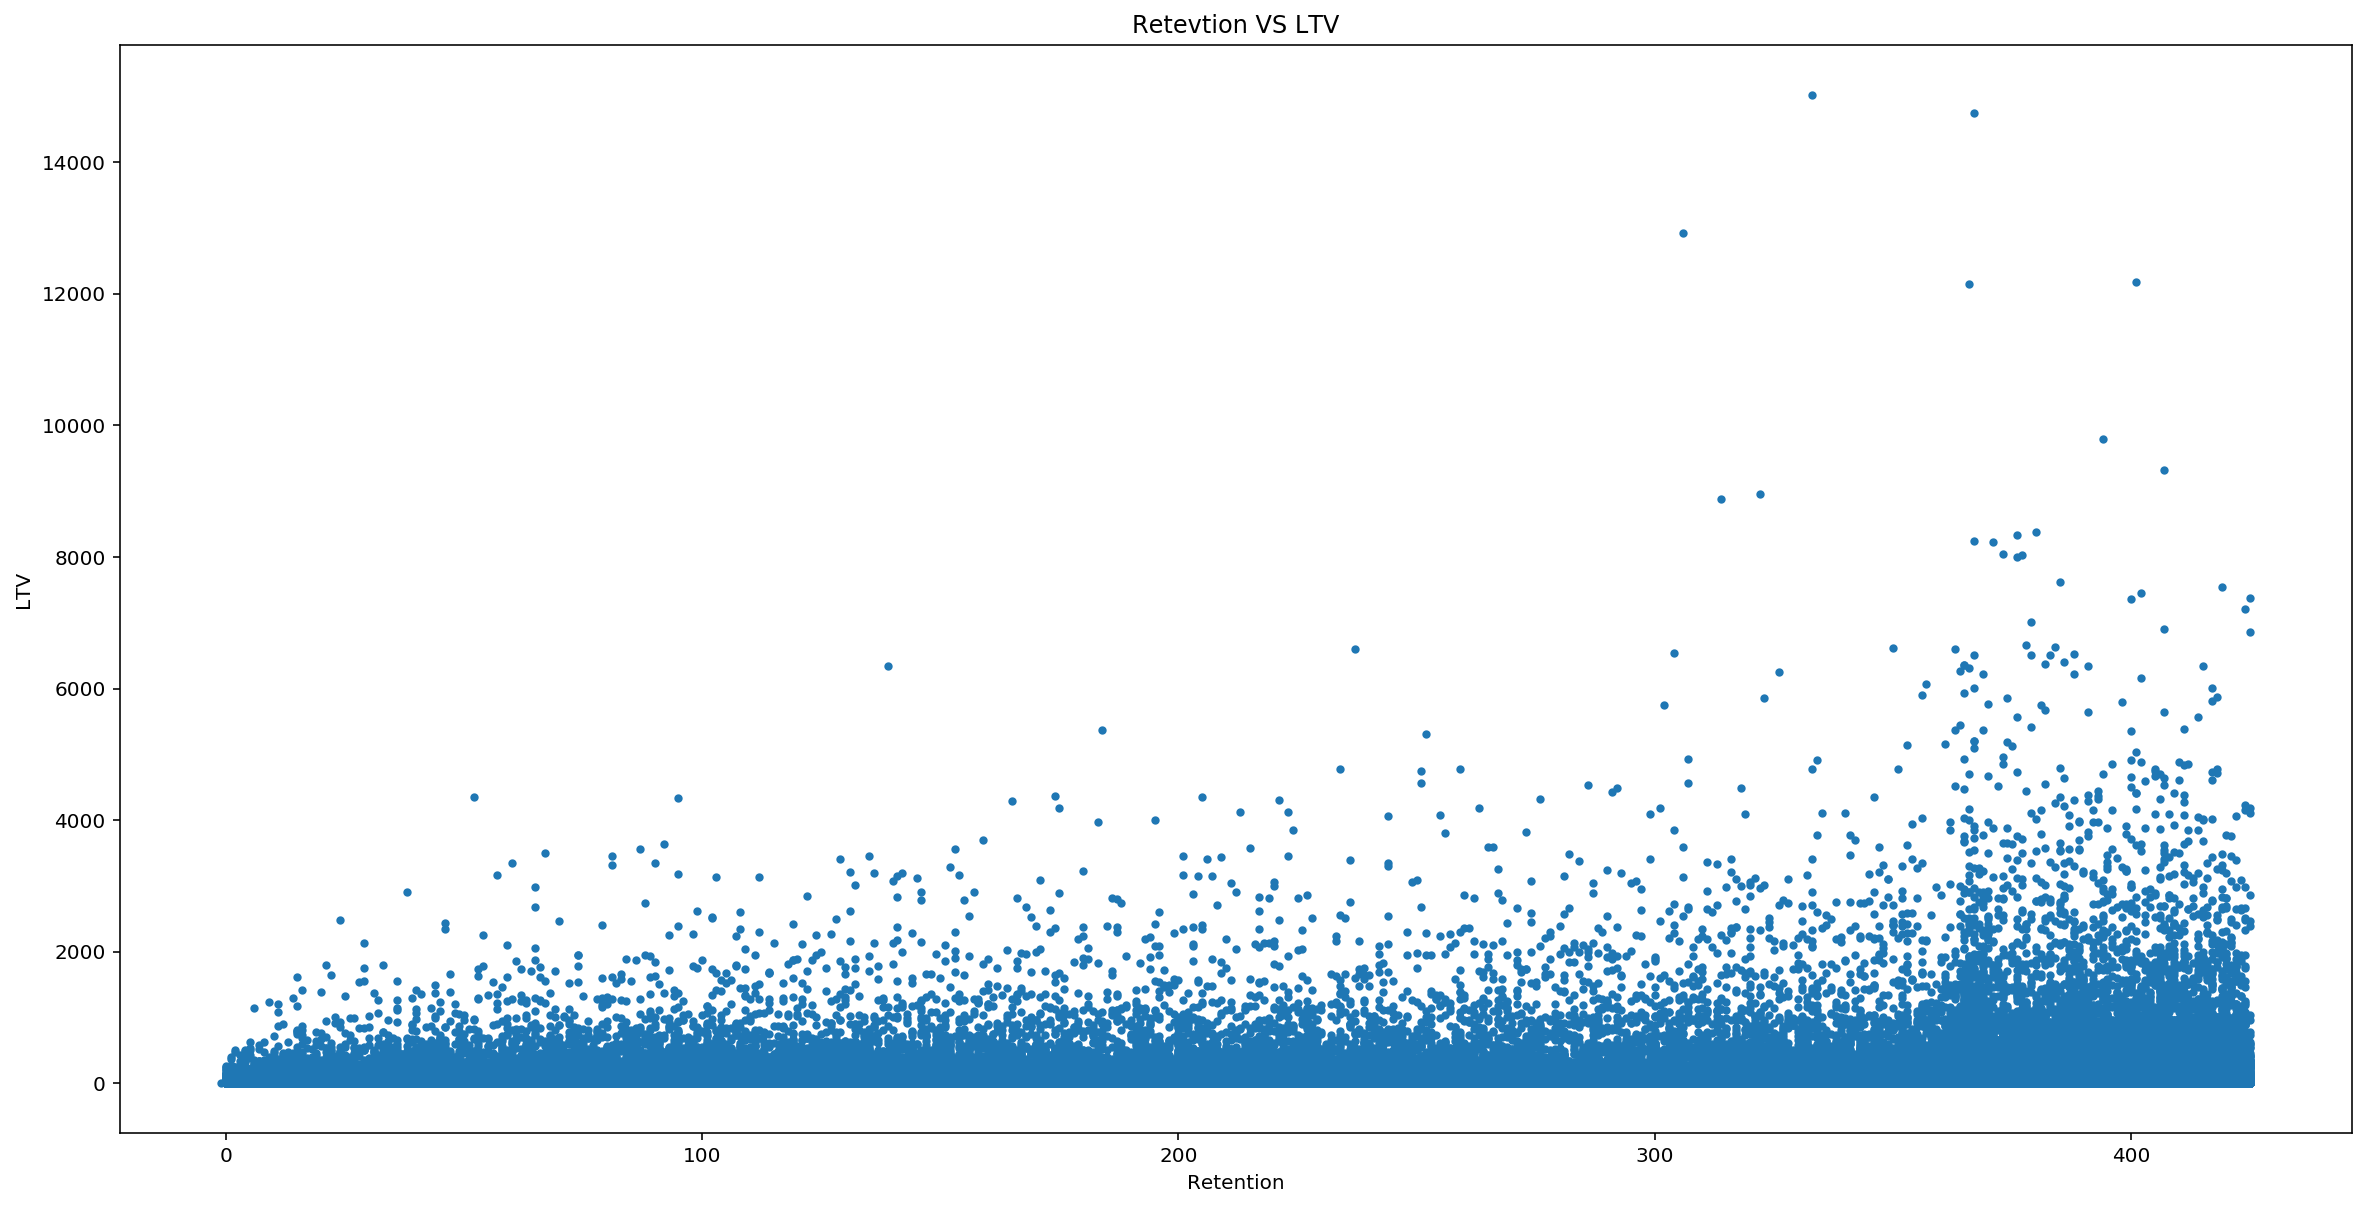

In [3]:
#散点图
plt.figure(figsize=(20,10))
plt.scatter(x=data.retention, y=data.LTV,s=10)
plt.title('Retevtion VS LTV')
plt.xlabel('Retention')
plt.ylabel('LTV')
data.corr()

In [4]:
def  bucket(x):
    if 0<=x<30:
        x=30
    elif 30<=x<60:
        x=60
    elif 60<=x<90:
        x=90
    elif 90<=x<120:
        x=120
    elif 120<=x<150:
        x=150
    elif 150<=x<180:
        x=180
    elif 180<=x<210:
        x=210
    elif 210<=x<240:
        x=240
    elif 240<=x<270:
        x=270
    elif 270<=x<300:
        x=300
    elif 300<=x<330:
        x=330
    elif 330<=x<360:
        x=360
    elif 360<=x<390:
        x=390
    else:
        x=425
    return x
data['retention_bucket']=data['retention'].map(bucket)

/Users/magictavern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


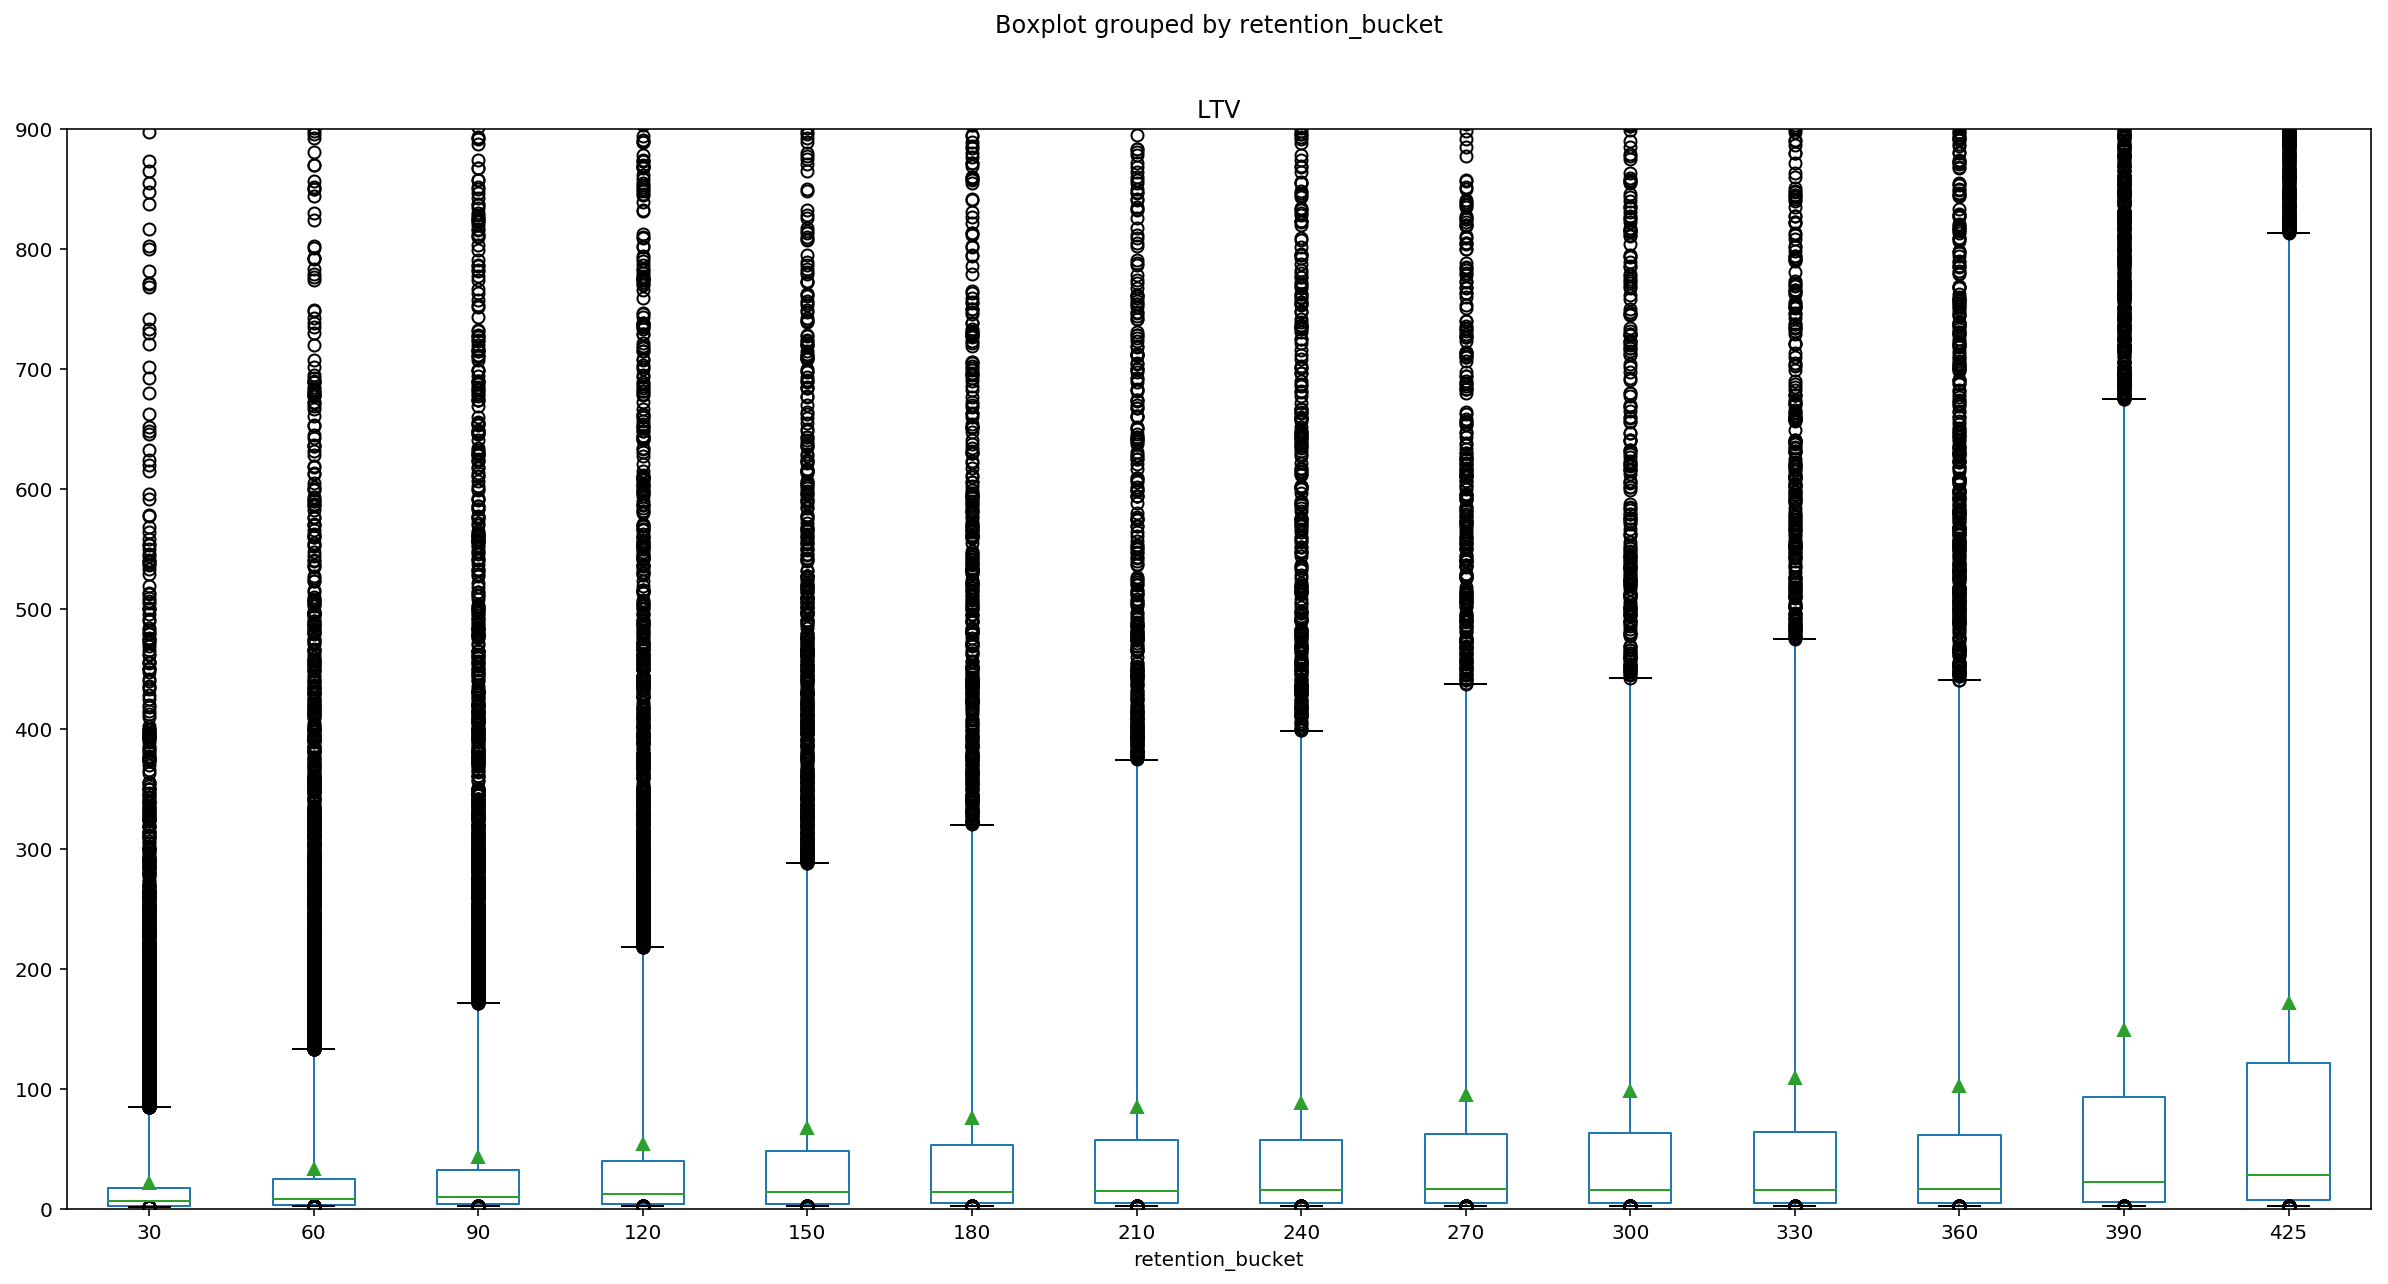

In [5]:
#箱形图
data.boxplot(column='LTV', by='retention_bucket',figsize=(20,10),whis = [5,95],showfliers=True,
                      showmeans=True# 以点的形式显示均值
            )# 设置均值点的属性，点的形状、填充色meanprops = {'marker':'D'}
plt.ylim(0,900)
plt.grid(False)
plt.show()

In [6]:
mean_ltv=data.groupby('retention_bucket')['LTV'].mean()
mean_retention=data.groupby('retention_bucket')['retention'].mean()
ltv_retention=pd.concat([mean_retention,mean_ltv],axis=1)

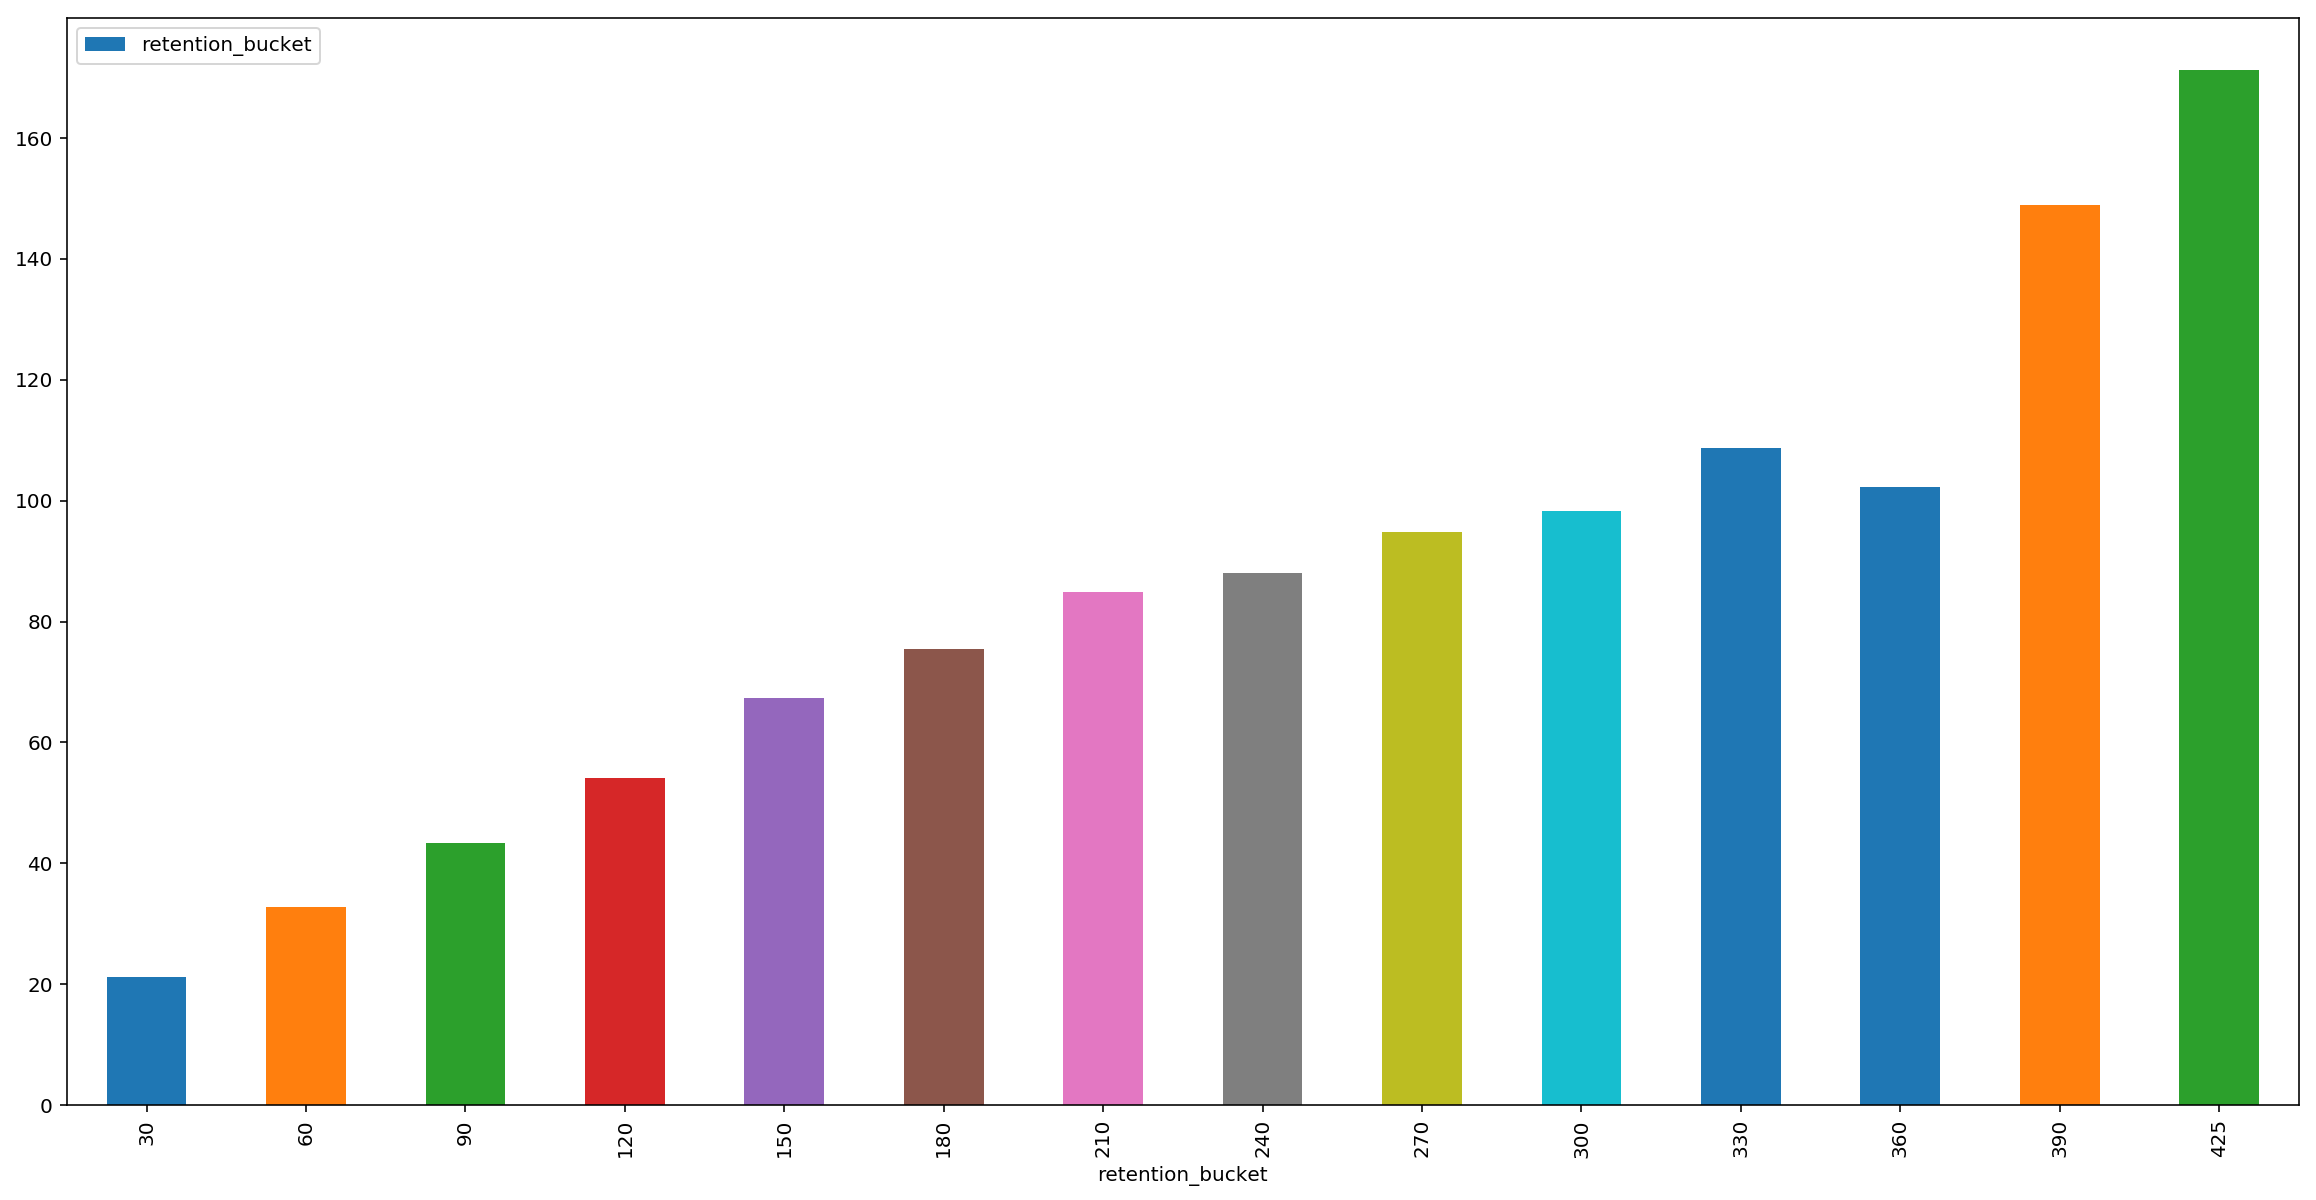

In [7]:
#柱状图
mean_ltv.plot.bar(figsize=(20,10),label='retention_bucket')#facecolor =None
plt.legend(loc="upper left") # label的位置在左上

Text(0.5,1,'ltv_retention')

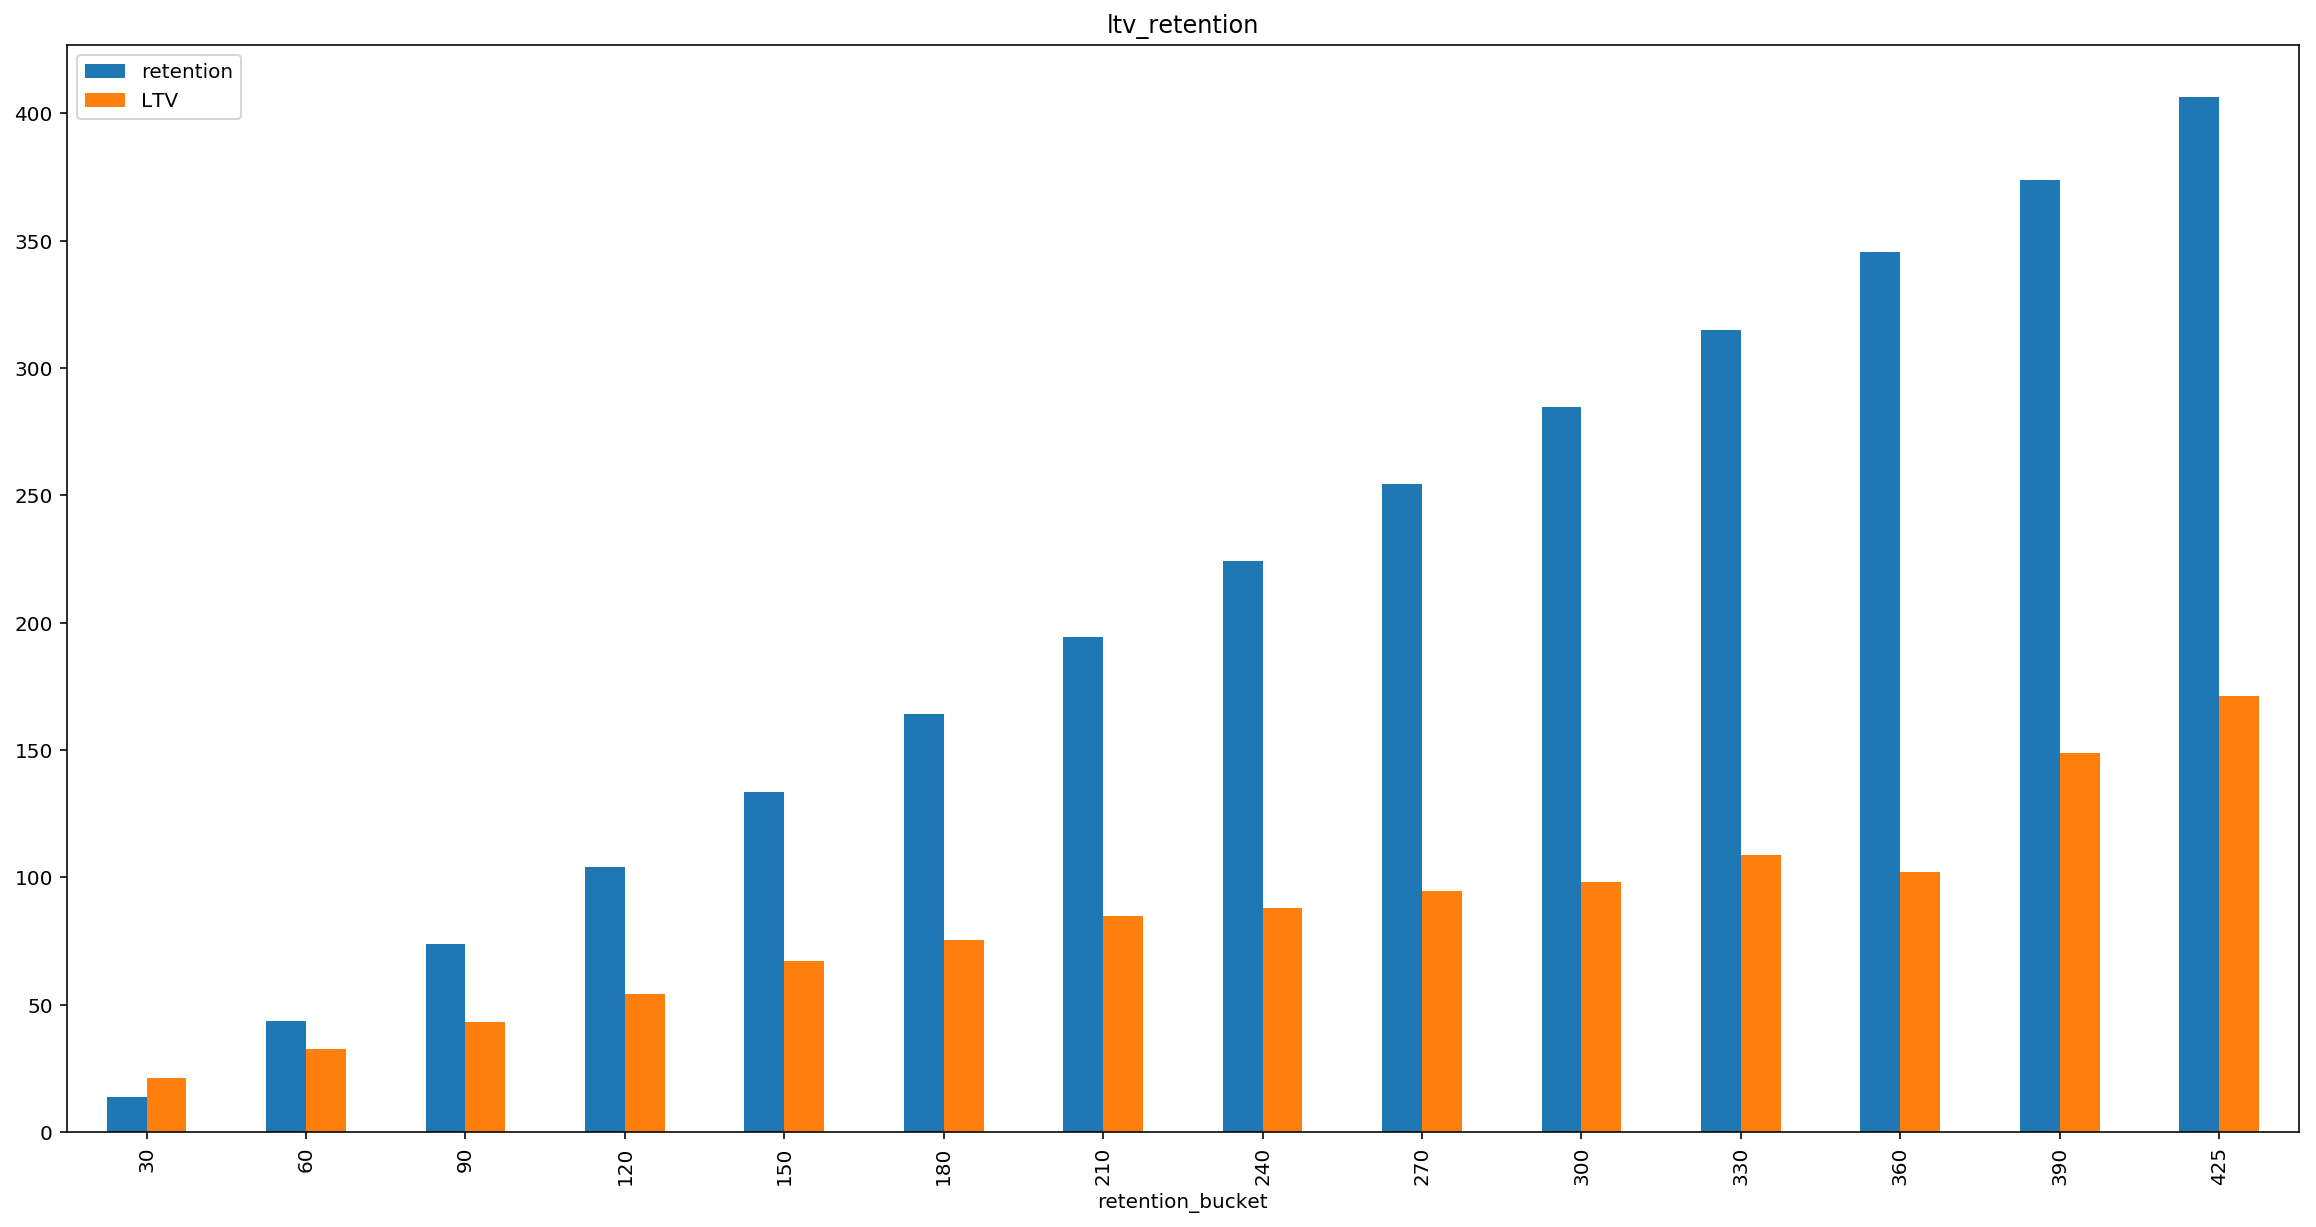

In [8]:
#多columns柱状图
ltv_retention.plot.bar(figsize=(20,10))
plt.title('ltv_retention')

Text(0,0.5,'LTV')

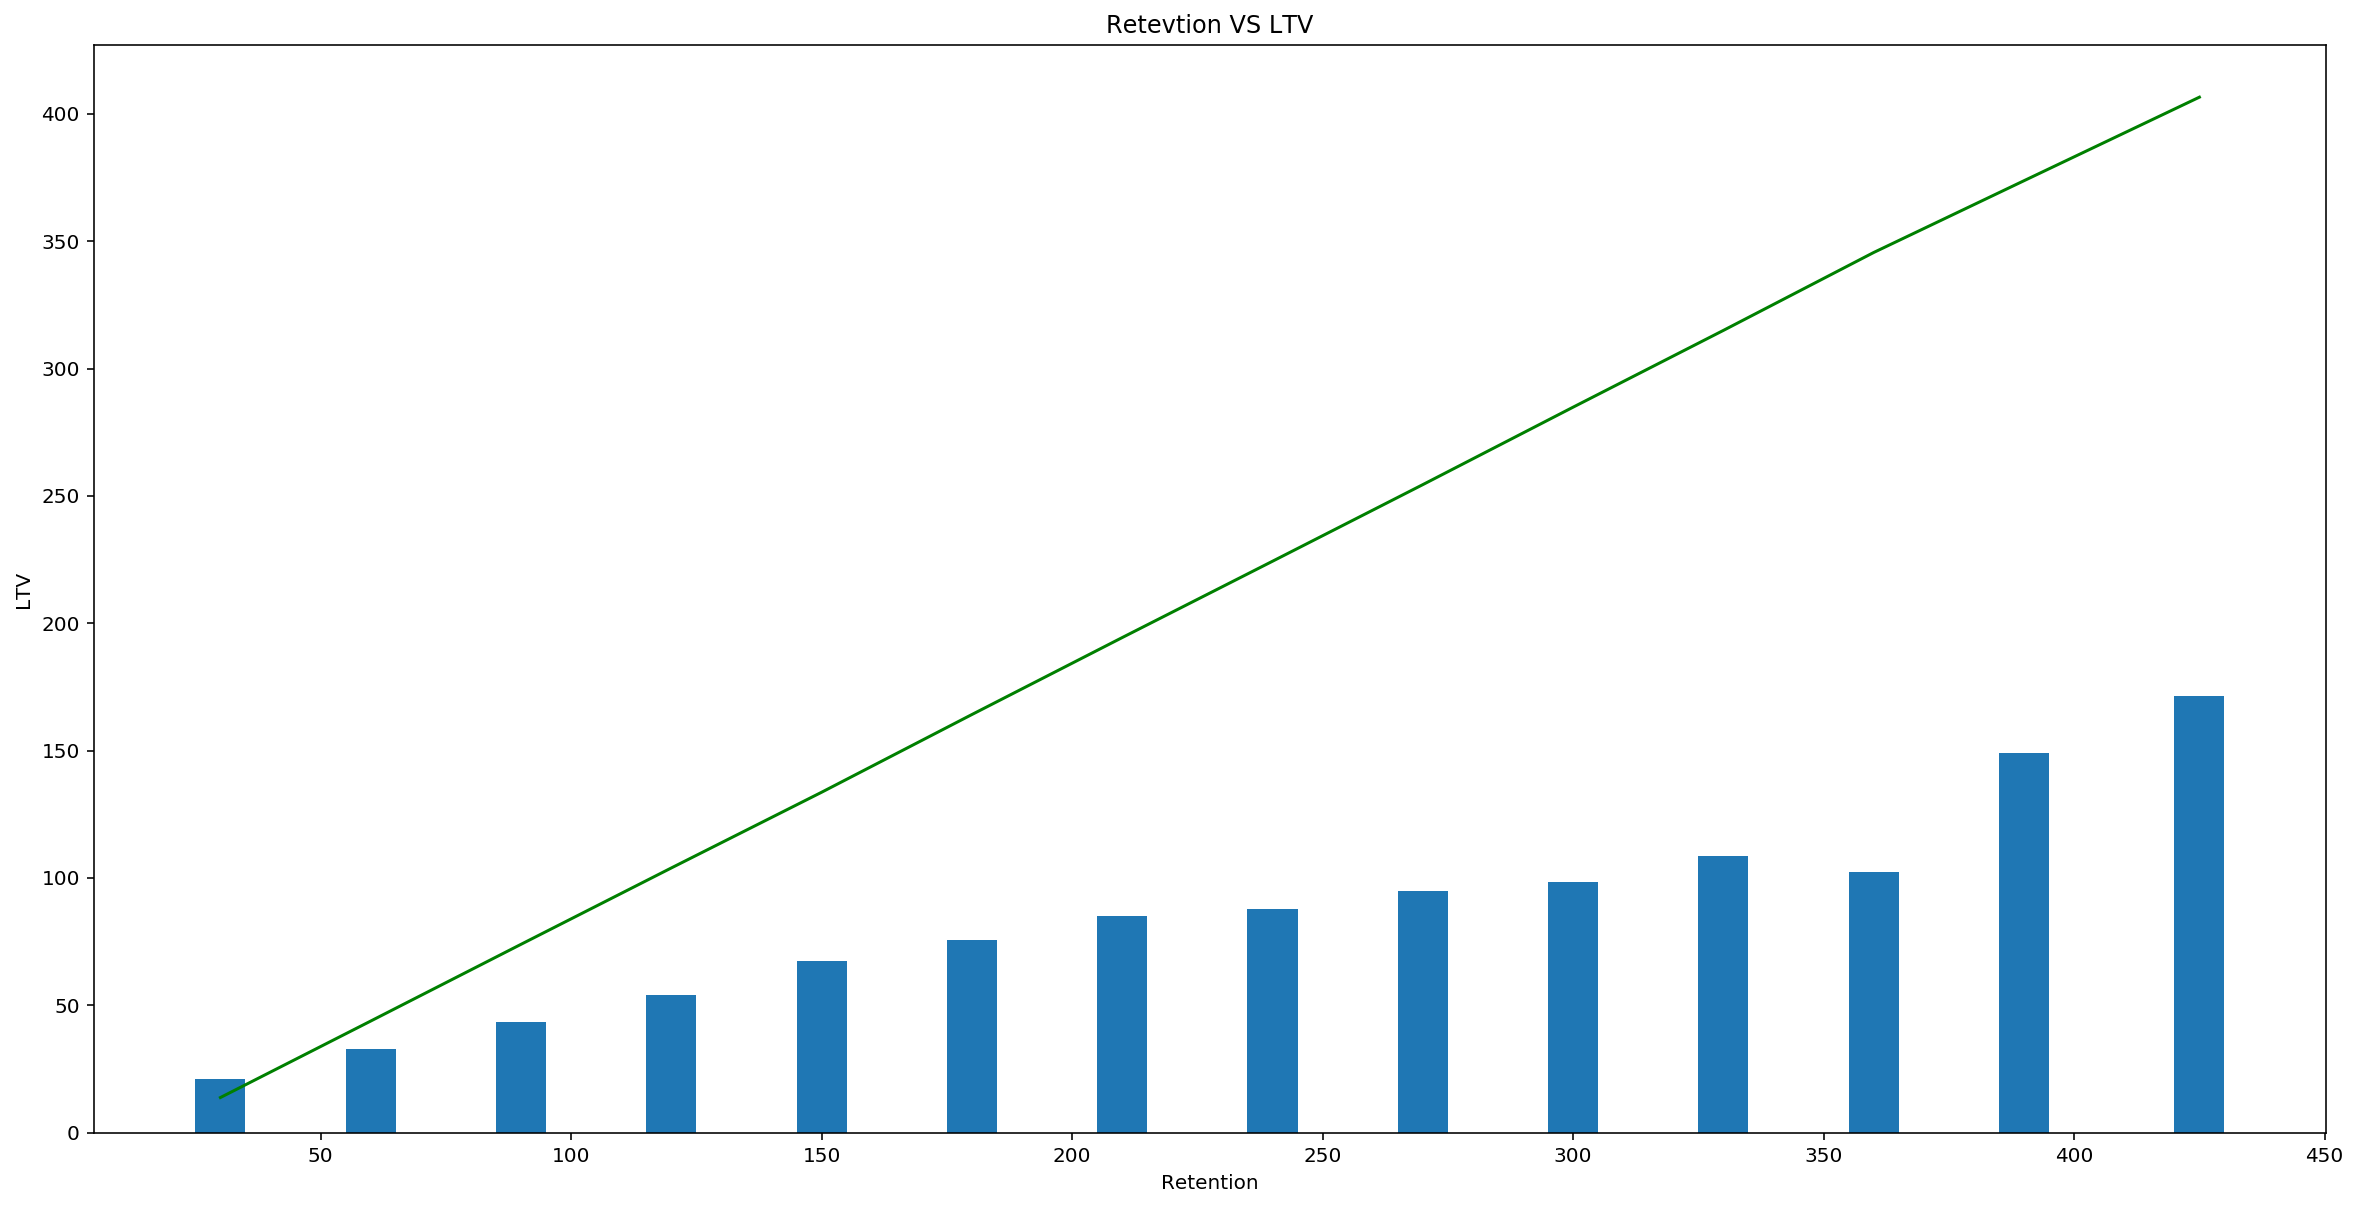

In [9]:
#折线图+条形图
plt.figure(figsize=(20,10))
plt.bar(mean_ltv.index,mean_ltv.values,width=10)#facecolor =None
plt.plot(mean_retention.index,mean_retention.values,color='green')#facecolor =None
plt.title('Retevtion VS LTV')
plt.xlabel('Retention')
plt.ylabel('LTV')